In [5]:
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from tkinter import filedialog
import datetime

In [2]:
root =tk.Tk()
root.withdraw()
filepath=filedialog.askopenfilename()
filepath


'C:/Users/Rafael Pietro/OneDrive/Cursos/DNC/Datasets/Analise de dados na pratica/sample_medicare.csv'

In [3]:
df= pd.read_csv(filepath)

In [4]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1750477758,RICHARDSON,FAZAL,GORMAN,IN,Optometry,S,HYDROCHLOROTHIAZIDE,CLOPIDOGREL BISULFATE,NaN,...,30.0,16800,1075.11,NaN,*,NaN,#,15.0,1140.0,NaN
1,1265604870,JOHNSON,PETER,FOUNTAIN VALLEY,IL,Nurse Practitioner,S,OXYCODONE HCL,GLIMEPIRIDE,NaN,...,12.0,3510,532.98,NaN,NaN,27.0,*,0.0,364.0,937.41
2,1295731255,MCMANMON,JONATHAN,POMPANO BEACH,IA,Family Practice,S,MECLIZINE HCL,GABAPENTIN,27.0,...,14.3,1440,485.72,NaN,#,46.0,NaN,38.0,NaN,0.00
3,1356337398,EAKES,KIRK,AUSTIN,VA,Nephrology,S,WARFARIN SODIUM,ZIPRASIDONE HCL,21.0,...,23.0,600,256.14,NaN,#,11.0,NaN,NaN,NaN,0.00
4,1265409056,WYNN,SARA,SMYRNA,OR,Physician Assistant,S,PAROXETINE HCL,VALPROIC ACID,NaN,...,112.0,1680,4013.17,NaN,*,14.0,#,88.9,NaN,NaN


In [6]:
df.dtypes

npi                                int64
nppes_provider_last_org_name      object
nppes_provider_first_name         object
nppes_provider_city               object
nppes_provider_state              object
specialty_description             object
description_flag                  object
drug_name                         object
generic_name                      object
bene_count                       float64
total_claim_count                  int64
total_30_day_fill_count          float64
total_day_supply                   int64
total_drug_cost                  float64
bene_count_ge65                  float64
bene_count_ge65_suppress_flag     object
total_claim_count_ge65           float64
ge65_suppress_flag                object
total_30_day_fill_count_ge65     float64
total_day_supply_ge65            float64
total_drug_cost_ge65             float64
dtype: object

In [28]:
df.shape[0]

100000

In [26]:
df.isnull().sum()

npi                                  0
nppes_provider_last_org_name         3
nppes_provider_first_name            2
nppes_provider_city                  0
nppes_provider_state                 0
specialty_description                0
description_flag                     0
drug_name                            0
generic_name                         0
bene_count                       61372
total_claim_count                    0
total_30_day_fill_count              0
total_day_supply                     0
total_drug_cost                      0
bene_count_ge65                  86087
bene_count_ge65_suppress_flag    13841
total_claim_count_ge65           42521
ge65_suppress_flag               57945
total_30_day_fill_count_ge65     42103
total_day_supply_ge65            42236
total_drug_cost_ge65             42339
dtype: int64

In [35]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]
# Note que temos um percentual alto de nulos em algumas colunas, devemos avalias.

bene_count_ge65                  0.86087
bene_count                       0.61372
ge65_suppress_flag               0.57945
total_claim_count_ge65           0.42521
total_drug_cost_ge65             0.42339
total_day_supply_ge65            0.42236
total_30_day_fill_count_ge65     0.42103
bene_count_ge65_suppress_flag    0.13841
nppes_provider_last_org_name     0.00003
nppes_provider_first_name        0.00002
total_day_supply                 0.00000
total_drug_cost                  0.00000
npi                              0.00000
total_30_day_fill_count          0.00000
generic_name                     0.00000
drug_name                        0.00000
description_flag                 0.00000
specialty_description            0.00000
nppes_provider_state             0.00000
nppes_provider_city              0.00000
total_claim_count                0.00000
dtype: float64

In [36]:
df.describe(percentiles=[0.001,.01,.1,.25,.5,.75,.9,.99,.999])
# Vemos que temos alguns outliers, onde 99,9% dos dados estão até  913 no total claim count,
# mas depois tem uma cauda até 3342.

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,1.000000e+05,38628.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,13913.000000,57479.000000,57897.000000,57764.000000,5.766100e+04
mean,1.498548e+09,28.713576,51.137660,74.597419,2109.676730,4.245201e+03,19.835118,48.060909,73.799373,2062.670591,3.465718e+03
std,2.880663e+08,27.706786,84.221171,129.506376,3929.466465,2.567230e+04,32.208941,94.803685,138.798766,3872.993071,2.243156e+04
min,1.003000e+09,11.000000,11.000000,11.000000,11.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.1%,1.003084e+09,11.000000,11.000000,11.000000,22.999000,2.555999e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,1.003999e+09,11.000000,11.000000,11.000000,68.000000,4.535980e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
10%,1.104009e+09,12.000000,12.000000,13.000000,288.000000,1.204800e+02,0.000000,11.000000,11.000000,107.000000,5.459000e+01
25%,1.245488e+09,14.000000,15.000000,19.000000,449.000000,2.517975e+02,0.000000,13.000000,15.600000,390.000000,1.984100e+02
50%,1.497844e+09,20.000000,24.000000,34.000000,900.000000,6.761400e+02,13.000000,21.000000,31.000000,854.000000,5.987300e+02
75%,1.740577e+09,32.000000,51.000000,72.000000,2010.000000,2.363220e+03,24.000000,46.000000,69.000000,1950.000000,2.104990e+03


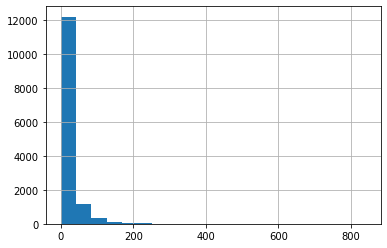

In [63]:
df["bene_count_ge65"].dropna().hist(bins=20)
plt.show()
# Aqui estamos tirando os NA para depois plotar o histograma desta coluna.

In [58]:
df[df["bene_count_ge65"]<45].count()
# Usei 45 pq fiz 913 (99,9% dos dados) -11 (0,1% dos dados) e dividi por 20 (20 bins)

npi                              12383
nppes_provider_last_org_name     12383
nppes_provider_first_name        12383
nppes_provider_city              12383
nppes_provider_state             12383
specialty_description            12383
description_flag                 12383
drug_name                        12383
generic_name                     12383
bene_count                        4693
total_claim_count                12383
total_30_day_fill_count          12383
total_day_supply                 12383
total_drug_cost                  12383
bene_count_ge65                  12383
bene_count_ge65_suppress_flag    10709
total_claim_count_ge65            7129
ge65_suppress_flag                5276
total_30_day_fill_count_ge65      7211
total_day_supply_ge65             7216
total_drug_cost_ge65              7089
dtype: int64

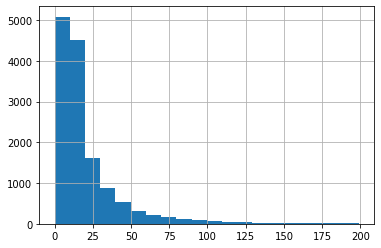

In [78]:
df.loc[df["bene_count_ge65"]<200,"bene_count_ge65"].dropna().hist(bins=20)
plt.show()
# Aqui tiramos aqueles outliers visivelmente presentes no primeiro gráfico, para vermos melhor.

In [83]:
df["description_flag"].value_counts(dropna=False)
# vendo se a flag só tem true ou falso de verdade

S    97586
T     2414
Name: description_flag, dtype: int64

In [86]:
df.description_flag.value_counts(dropna=False)

S    97586
T     2414
Name: description_flag, dtype: int64

In [94]:
df.ge65_suppress_flag.value_counts(dropna=False)

NaN    57945
#      27365
*      14690
Name: ge65_suppress_flag, dtype: int64

In [96]:
df[["description_flag","ge65_suppress_flag"]].apply(pd.Series.value_counts,dropna=False)
# Fazendo a mesma coisa de cima, mas para mais de uma coluna de uma vez
# Aqui vemos que a primeira coluna tem somente S e T
# Enquanto a segunda coluna tem NaN, # e *

,description_flag,ge65_suppress_flag
S,97586.0,NaN
T,2414.0,NaN
NaN,NaN,57945.0
#,NaN,27365.0
*,NaN,14690.0


<AxesSubplot:>

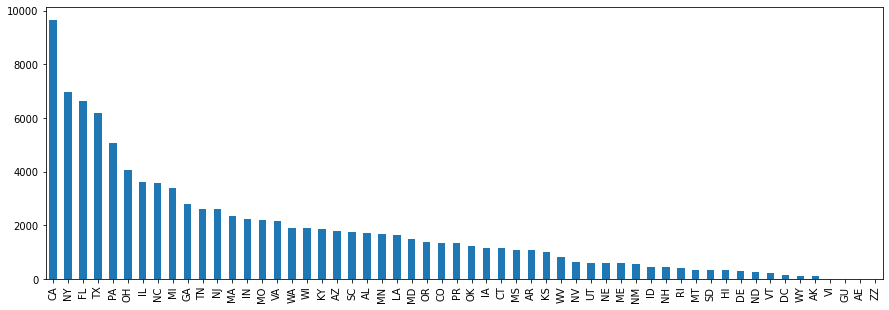

In [104]:
# Fazendo gráfico
fig, axs = plt.subplots(figsize=(15,5))
df["nppes_provider_state"].value_counts(dropna=False).plot(kind="bar")